**Table of contents**<a id='toc0_'></a>    
- [Análisis de la Prueba A/B: Sistema de Recomendaciones Mejorado](#toc1_)    
- [Introducción](#toc2_)    
- [Objetico General](#toc3_)    
- [Descripcion del Proyecto:](#toc4_)    
    - [Puntos Clave:](#toc4_1_1_)    
- [Descripcion de los Datos:](#toc5_)    
- [Analisis Exploratorio de Datos (EDA)](#toc6_)    
  - [¿Que Eventos hay en los registros?](#toc6_1_)    
  - [Promedio de eventos por usuario](#toc6_2_)    
    - [Analisis preliminar](#toc6_2_1_)    
  - [Cantidad de usuarios unicos que realizaron cada una de las etapas](#toc6_3_)    
    - [Interpretación de las tasas de conversión](#toc6_3_1_)    
  - [Numero de Eventos por usuario y por Muestra](#toc6_4_)    
    - [Evaluacion de la distribución de eventos por grupo](#toc6_4_1_)    
  - [Usuarios que están presentes en ambas muestras](#toc6_5_)    
  - [¿Cómo se distribuye el número de eventos entre los días?](#toc6_6_)    
  - [Calculo del tamaño minimo de la muestra para la prueba A/B](#toc6_7_)    
    - [Conclusiones preliminares](#toc6_7_1_)    
  - [Test A/B](#toc6_8_)    
    - [Automatizacion del analisis de la prueba A/B](#toc6_8_1_)    
    - [Resultados de la prueba A/B](#toc6_8_2_)    
- [Conclusion Final de la prueba A/B](#toc7_)    
  - [Interpretación de los Resultados](#toc7_1_)    
  - [Recomendaciones](#toc7_2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Análisis de la Prueba A/B: Sistema de Recomendaciones Mejorado](#toc0_)

# <a id='toc2_'></a>[Introducción](#toc0_)
Recientemente, una tienda en línea internacional implementó una prueba A/B para analizar el efecto de un sistema de recomendaciones mejorado y un nuevo embudo de pago sobre el comportamiento de los usuarios en la región de la Unión Europea. La prueba se diseñó para medir cambios en la interacción de los usuarios con la plataforma, especialmente en las etapas críticas del embudo de conversión: vistas de producto, adición de productos al carrito y compras.

El presente análisis se basa en los datos recolectados durante la prueba, con el fin de explorar su calidad, identificar patrones relevantes y sentar las bases para una evaluación rigurosa de los resultados obtenidos.

El análisis se centrará en verificar la correcta ejecución de la prueba, explorar la calidad y características de los datos, y medir si la introducción del nuevo sistema genera un aumento significativo —de al menos un 10%— en las tasas de conversión en las etapas clave del embudo: vistas de producto, adición al carrito y compras. Para ello, se emplearán técnicas de análisis exploratorio y pruebas estadísticas que permitan determinar la efectividad real de la nueva funcionalidad.

# <a id='toc3_'></a>[Objetico General](#toc0_)

 A partir del análisis de los datos recolectados en la prueba A/B, evaluar el posible impacto de la implementación de un sistema de recomendaciones mejorado y un nuevo embudo de pago en las tasas de conversión de los usuarios en una tienda en línea internacional.

# <a id='toc4_'></a>[Descripcion del Proyecto:](#toc0_)

Este proyecto tiene como objetivo analizar los resultados de una prueba A/B denominada recommender_system_test, realizada  para evaluar el impacto de un sistema de recomendaciones mejorado y un nuevo embudo de pago en el comportamiento de los usuarios.

### <a id='toc4_1_1_'></a>[Puntos Clave:](#toc0_)

- La prueba se llevó a cabo en la región de la Unión Europea y se centró en un subconjunto del 15% de los nuevos usuarios registrados entre el 7 y el 21 de diciembre de 2020. Los datos de la prueba abarcan eventos registrados hasta el 1 de enero de 2021.

- El propósito de la prueba es determinar si el nuevo sistema de recomendaciones mejora las tasas de conversión en las etapas clave del embudo de ventas: vistas de producto (product_page), adición de productos al carrito (product_card) y compras (purchase). Se espera que el grupo experimental (B), expuesto al nuevo sistema, muestre un aumento de al menos un 10% en cada etapa del embudo en comparación con el grupo control (A).

- El análisis incluye la verificación de la correcta ejecución de la prueba, la exploración de los datos recolectados y la evaluación estadística de los resultados. Los hallazgos permitirán determinar si la nueva funcionalidad cumple con los objetivos planteados y si es viable su implementación definitiva.

# <a id='toc5_'></a>[Descripcion de los Datos:](#toc0_)

Estructura `ab_project_marketing_events_us.csv` el calendario de eventos de marketing para 2020:

- `name`: el nombre del evento de marketing
- `regions`: regiones donde se llevará a cabo la campaña publicitaria
- `start_dt`: fecha de inicio de la campaña
- `finish_dt`: fecha de finalización de la campaña

Estructura `final_ab_new_users_upd_us.csv` todos los usuarios que se registraron en la tienda en línea desde el 7 hasta el 21 de diciembre de 2020:

- `user_id`
- `first_date`: fecha de inscripción
- `region`
- `device`: dispositivo utilizado para la inscripción

Estructura `final_ab_events_upd_us.csv` todos los eventos de los nuevos usuarios en el período comprendido entre el 7 de diciembre de 2020 y el 1 de enero de 2021:

- `user_id`
- `event_dt`: fecha y hora del evento
- `event_name`: nombre del tipo de evento
- `details`: datos adicionales sobre el evento (por ejemplo, el pedido total en USD para los eventos `purchase`)

Estructura `final_ab_participants_upd_us.csv` tabla con los datos de los participantes de la prueba:

- `user_id`
- `ab_test`: nombre de la prueba
- `group`: el grupo de prueba al que pertenecía el usuario

In [594]:
# Cargar todas las librerias
import pandas as pd 
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import mannwhitneyu
from statsmodels.stats.proportion import proportions_ztest
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import NormalIndPower
import numpy as np 


In [ ]:
# Cargar el dataset

marketing_events= pd.read_csv('datasets/ab_project_marketing_events_us.csv', sep=',')
new_users= pd.read_csv('datasets/final_ab_new_users_upd_us.csv', sep=',')
events= pd.read_csv('datasets/final_ab_events_upd_us.csv', sep=',')
participants= pd.read_csv('datasets/final_ab_participants_upd_us.csv', sep=',')

# <a id='toc6_'></a>[Analisis Exploratorio de Datos (EDA)](#toc0_)



In [596]:
# Lectura de Marketing Events

marketing_events.info()
marketing_events.head(14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 580.0+ bytes


,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


In [597]:
# Correccion de tipos de datos
marketing_events['start_dt']= pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt']= pd.to_datetime(marketing_events['finish_dt'])

marketing_events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 580.0+ bytes


In [598]:
# Lectura de New Users
new_users.info()
new_users.sample(14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


,user_id,first_date,region,device
2865,D9F50E3392013747,2020-12-07,EU,Android
16247,1D8C2420BB883A07,2020-12-21,EU,PC
6581,E377DC86B902243C,2020-12-14,EU,PC
10481,A795FB6F4FCB303C,2020-12-14,CIS,iPhone
57232,69898547DFCE7D6F,2020-12-20,EU,iPhone
55946,7A06204A190208D0,2020-12-20,APAC,iPhone
9172,ABDF38488A356636,2020-12-14,EU,Android
36976,A02094E78BFE7744,2020-12-17,EU,iPhone
28720,72184FEBBFA8A3E9,2020-12-16,EU,PC
35108,653C3F8E8028C5CA,2020-12-17,N.America,Android


In [599]:
# Correccion de tipos de datos
new_users.drop_duplicates(inplace=True)
new_users['first_date']= pd.to_datetime(new_users['first_date'])
new_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     58703 non-null  object        
 1   first_date  58703 non-null  datetime64[ns]
 2   region      58703 non-null  object        
 3   device      58703 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 1.8+ MB


- Para New Users se corrigieron los tipos de datos, se verificó la información y se exploraron las primeras filas del dataset.

In [600]:
# Lectura de events
events.info()
events.sample(14)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     60314 non-null   float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


,user_id,event_dt,event_name,details
137493,6CA588E507F1C51E,2020-12-11 21:38:30,product_page,NaN
32422,71A320FF48BC1F83,2020-12-19 10:42:40,purchase,4.99
53591,C5E6575621E417F4,2020-12-24 23:28:16,purchase,9.99
366744,AA82CA6F46B2DCD8,2020-12-21 08:26:25,login,NaN
163391,36C5F58F0DDCA718,2020-12-15 15:58:49,product_page,NaN
163255,1A4268BA95D274A0,2020-12-15 09:28:59,product_page,NaN
178210,A31CC28A579DCE8F,2020-12-18 01:35:09,product_page,NaN
164421,65A33D1E2F637CE6,2020-12-16 12:20:06,product_page,NaN
270308,6BDD58F45DD4AE8A,2020-12-12 07:34:44,login,NaN
364775,60B6BFC20ACDAF56,2020-12-21 07:47:54,login,NaN


In [601]:
# Correccion de tipos de datos

events['event_dt']= pd.to_datetime(events['event_dt'])

# Reemplazo de NAN
events['details']= events['details'].fillna(0)
events.drop_duplicates()
events.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     423761 non-null  object        
 1   event_dt    423761 non-null  datetime64[ns]
 2   event_name  423761 non-null  object        
 3   details     423761 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 12.9+ MB


- Para la columna `Details` del dataset `events`, se reemplazarán los valores `NaN` por 0, ya que se trata de un campo numérico que representa el total del pedido en USD especificamente para el evento `purchase`. Esto permitirá realizar cálculos precisos sin perder información valiosa.

In [ ]:
# Lectura del dataset participants
participants.drop_duplicates(inplace=True)
participants.info()
participants.sample(14)


print(participants['user_id'].nunique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB
13638


## <a id='toc6_1_'></a>[¿Que Eventos hay en los registros?](#toc0_)

event_name
login           182465
product_page    120862
purchase         60314
product_cart     60120
Name: count, dtype: int64


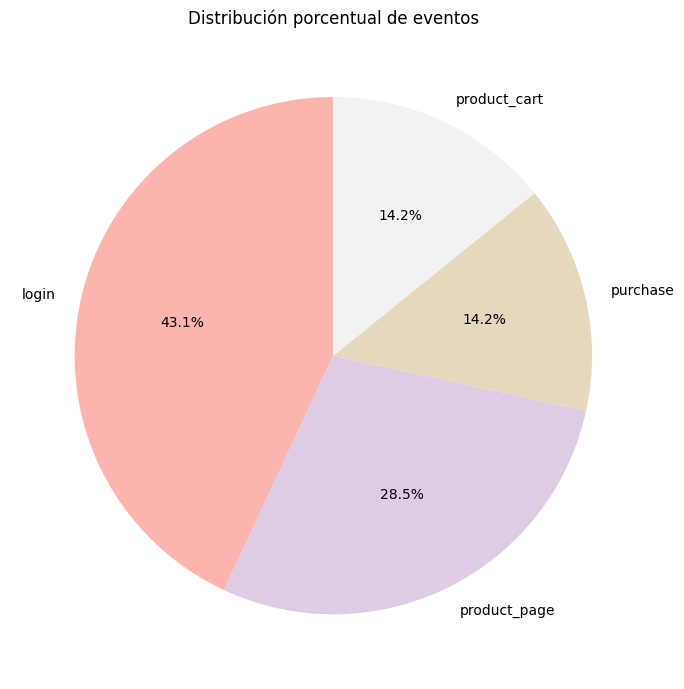

In [ ]:
# Cantidad de usuarios por Evento 

events_count= events['event_name'].value_counts()
print(events_count)


# Frecuecnai de los eventos
event_frecuencia= events['event_name'].value_counts(normalize=True)


# Grafico de la cantidad de eventos

plt.figure(figsize=(7,7))
event_frecuencia.plot(kind='pie',autopct='%1.1f%%',startangle=90,cmap='Pastel1')
plt.title('Distribución porcentual de eventos')
plt.ylabel('') 
plt.tight_layout()
plt.show()


## <a id='toc6_2_'></a>[Promedio de eventos por usuario](#toc0_)


        event_count
count  58703.000000
mean       7.218728
std        4.122609
min        1.000000
25%        4.000000
50%        6.000000
75%        9.000000
max       36.000000


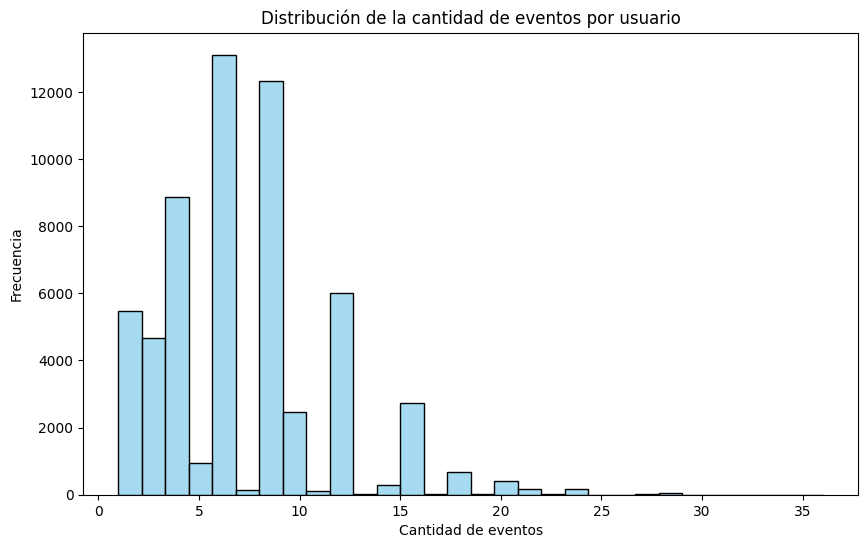

In [604]:
# Promedo de eventos por usuario

users_event_count= events.groupby('user_id')['event_name'].count().reset_index()
users_event_count.columns=['user_id', 'event_count']
print(users_event_count.describe())

# Grafico de la cantidad de eventos por usuario
plt.figure(figsize=(10, 6))
sns.histplot(users_event_count['event_count'], bins=30, color='skyblue')
plt.title('Distribución de la cantidad de eventos por usuario')
plt.xlabel('Cantidad de eventos')
plt.ylabel('Frecuencia')
plt.show()


In [ ]:
# Promedio de eventos por usuario
users_count_mean= users_event_count['event_count'].mean()
users_event_median= users_event_count['event_count'].median()
users_count_mode= users_event_count['event_count'].mode()

print(f"Promedio de eventos por usuario: {users_count_mean}")
print(f"Mediana de eventos por usuario: {users_event_median}")
print(f"Moda de eventos por usuario: {users_count_mode[0]}")


Promedio de eventos por usuario: 7.218728174028585
Mediana de eventos por usuario: 6.0
Moda de eventos por usuario: 6


### <a id='toc6_2_1_'></a>[Analisis preliminar](#toc0_)
- De acuerdo a los y a su distribucion, se puede obsevar que el promedio es de 7.21 eventos por usuario, con una mediana de 6 y una moda de 6, Aunque la mayoría de los datos están concentrados en valores bajos, hay una cola que se extiende hacia valores más altos (por ejemplo, usuarios con más de 10 eventos). Esto es típico de una distribución sesgada a la derecha., aunque la distribucion es asimetrica, Esto puede ser un indicativo de usuarios muy activos o de un comportamiento anomalo en el registro de eventos.  

## <a id='toc6_3_'></a>[Cantidad de usuarios unicos que realizaron cada una de las etapas](#toc0_)



- De acuerdo con las etapas que cada usuario atraviesa en el embudo y su respectivo grupo de asignación, es fundamental trazar la ruta completa y calcular la tasa de conversión en cada paso. A continuación, se detallan las tasas de conversión correspondientes a cada etapa del proceso.

     event_name user_id
                nunique
0         login   58696
1  product_page   38929
2      purchase   19568
3  product_cart   19284


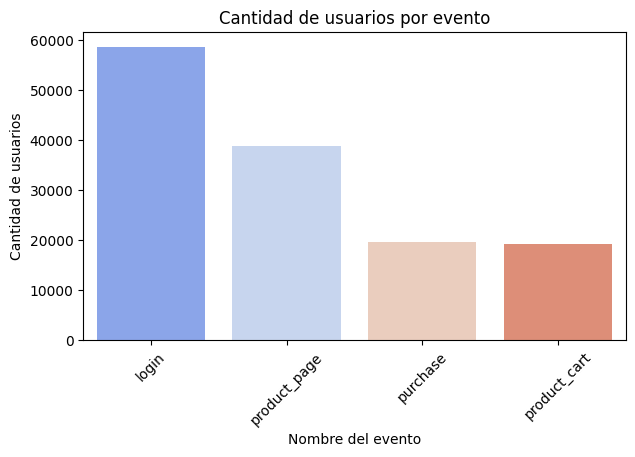

In [606]:
# Cantidad de usuarios unicos que realizar cada uno de los eventos 

users_count= (
events.groupby('event_name').agg({'user_id':['nunique']}).sort_values(by=('user_id','nunique'),ascending=False)
)
print(users_count.reset_index())

# Grafico de la cantidad de usuarios que realizaron cada uno de los eventos
plt.figure(figsize=(7, 4))
sns.barplot(data=users_count, x='event_name', y=('user_id', 'nunique'), hue='event_name', palette='coolwarm')
plt.title('Cantidad de usuarios por evento')
plt.xlabel('Nombre del evento')
plt.ylabel('Cantidad de usuarios')
plt.xticks(rotation=45)
plt.show()


In [ ]:
users_count = pd.DataFrame(users_count).squeeze()

users_count = users_count.drop(columns=['event_name', 'level_0', 'level_1'])
print(users_count)  
# Cálculo de proporciones
p1 = users_count['product_page'] / users_count['login']
p2 = users_count['purchase'] / users_count['product_page']
p3 = users_count['product_cart'] / users_count['purchase']
p_total = users_count['purchase'] / users_count['login']

# Mostrar resultados
print(f"Etapa 1 → 2 (login → product_page): {p1:.2%}")
print(f"Etapa 2 → 3 (product_page → Cart): {p2:.2%}")
print(f"Etapa 3 → 4 (Cart → Payment): {p3:.2%}")
print(f"\nTotal (login → Payment): {p_total:.2%}")

event_name
login           58696
product_page    38929
purchase        19568
product_cart    19284
Name: (user_id, nunique), dtype: int64
Etapa 1 → 2 (login → product_page): 66.32%
Etapa 2 → 3 (product_page → Cart): 50.27%
Etapa 3 → 4 (Cart → Payment): 98.55%

Total (login → Payment): 33.34%


### <a id='toc6_3_1_'></a>[Interpretación de las tasas de conversión](#toc0_)
- La tasa de conversion de ``la etapa 1 a la etapa 2 (logic → product_page) es del 66.32%``, lo que indica que aproximadamente dos tercios de los usuarios que ingresaron a la plataforma visitaron al menos una página de producto.

- La tasa de conversion de ``la etapa 2 a la etapa 3 (product_page → product_cart) es del 50.27%`` , lo que sugiere que la mitad de los usuarios que vieron productos decidieron agregar al menos uno al carrito.

- La tasa de conversion de ``la etapa 3 a la etapa 4 (product_cart → purchase) es del 98.55% ``, lo que indica que casi todos los usuarios que agregaron productos al carrito completaron la compra.

Mas sin embargo la tasa de conversión total desde ``la etapa 1 (login) hasta la etapa 4 (purchase) es del 33.34%``, lo que indica que aproximadamente un tercio de los usuarios que ingresaron a la plataforma realizaron una compra.  



## <a id='toc6_4_'></a>[Numero de Eventos por usuario y por Muestra](#toc0_)

- Para el analisis de los resultados de las pruebas A/B, es importante calcular el número de eventos por usuario y por muestra. Esto nos permitirá entender la distribución de los eventos entre los usuarios y cómo se comportan en cada grupo de prueba.


In [608]:
# Union de los datasets

ab_group_event = pd.merge(events, participants, on='user_id', how= 'left') 

# Filtrado de eventos por grupo A y B

ab_group_a = ab_group_event[ab_group_event['group'] == 'A']
ab_group_b = ab_group_event[ab_group_event['group'] == 'B']

# Numero de eventos por usuario y por muestra

users_count_a = ab_group_a.groupby('user_id')['event_name'].count().reset_index()
users_count_a.columns = ['user_id', 'event_count']
print(f"Estadistica descriptiva del grupo A: \n{users_count_a.describe()}\n")

users_count_b = ab_group_b.groupby('user_id')['event_name'].count().reset_index()
users_count_b.columns = ['user_id', 'event_count']
print(f"Estadistica descriptiva del grupo B: \n{users_count_b.describe()}")




Estadistica descriptiva del grupo A: 
       event_count
count  7874.000000
mean      7.455550
std       4.475159
min       1.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      40.000000

Estadistica descriptiva del grupo B: 
       event_count
count  6205.000000
mean      7.112490
std       4.246201
min       1.000000
25%       4.000000
50%       6.000000
75%       9.000000
max      36.000000


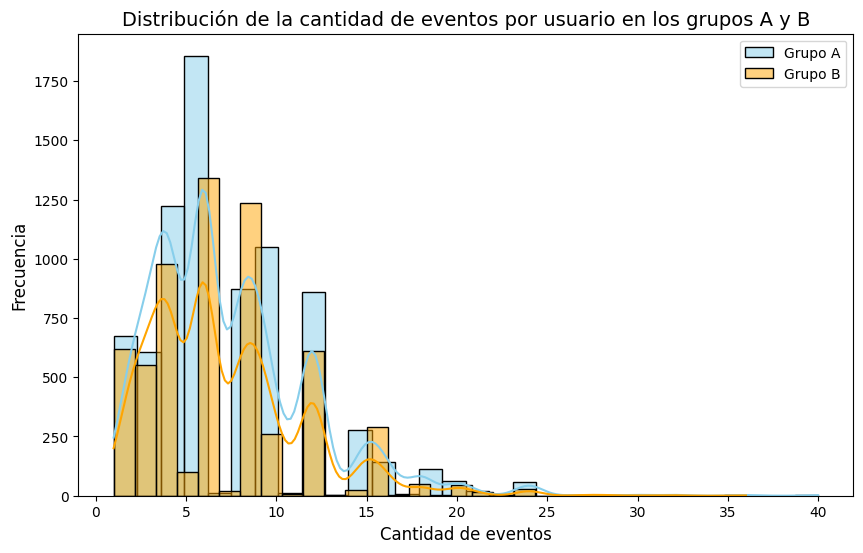

In [ ]:
# Distribución de la cantidad de eventos por usuario en el grupo


plt.figure(figsize=(10, 6))
sns.histplot(users_count_a['event_count'], bins=30, color='skyblue', label='Grupo A', kde=True)
sns.histplot(users_count_b['event_count'], bins=30, color='orange', label='Grupo B', kde=True)

# Agregar título y etiquetas
plt.title('Distribución de la cantidad de eventos por usuario en los grupos A y B', fontsize=14)
plt.xlabel('Cantidad de eventos', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)

plt.legend()
plt.show()

### <a id='toc6_4_1_'></a>[Evaluacion de la distribución de eventos por grupo](#toc0_)

- Para verificar si las distribuciones son estadísticamente similares, se usara la prueba de Mann-Whitney U donde: 

- - ``Si el p-valor es menor que 0.05``, se puede concluir que las distribuciones no son iguales.
- - ``Si el p-valor es mayor o igual a 0.05``, no hay evidencia suficiente para decir que las distribuciones son diferentes.


In [610]:
# Prueba de Mann-Whitney U para comparar las distribuciones de eventos entre los grupos A y B

# Prueba de Mann-Whitney U
stat, p = mannwhitneyu(users_count_a['event_count'], users_count_b['event_count'], alternative='two-sided')

alfa= 0.05

if p < alfa:
    print(f"Las distribuciones son diferentes (U={stat}, p={p})")
else:
    print(f"No hay evidencia suficiente para afirmar que las distribuciones son diferentes (U={stat}, p={p})")
    
# Mostrar el estadístico U y el p-valor
print(f"Estadístico U: {stat}, p-valor: {p}")

Las distribuciones son diferentes (U=25458558.5, p=1.4211342403215935e-05)
Estadístico U: 25458558.5, p-valor: 1.4211342403215935e-05


- Al evaluar la distribucion de eventos por grupo, de acurdo a la prueba de Mann-Whitney U, se obtiene un p-valor por debajo del umbral alfa, lo que indica que aparentemente las distribuciones de eventos por usuario en los grupos A y B son diferentes. En un escenario optimista esto sugiere que el nuevo sistema de recomendaciones ha influido en la cantidad de eventos generados por los usuarios en el grupo B en comparación con el grupo A, en contra parte puede ser la consecuencia de una ejecucion anomala del experimento, por lo que se recomienda realizar un analisis mas profundo de los datos para determinar si realmente existe una diferencia significativa entre los grupos A y B.

## <a id='toc6_5_'></a>[Usuarios que están presentes en ambas muestras](#toc0_)

In [611]:
# Número de usuarios únicos en cada grupo
num_users_a = ab_group_a['user_id'].nunique()
num_users_b = ab_group_b['user_id'].nunique()

# Número total de usuarios únicos antes de la limpieza
print(f"Número de usuarios en el grupo A: {num_users_a}")
print(f"Número de usuarios en el grupo B: {num_users_b}")


# Encontrar usuarios comunes
common_users = set(ab_group_a['user_id']).intersection(set(ab_group_b['user_id']))

# Mostrar resultados
print(f"Número de usuarios presentes en ambas muestras: {len(common_users)}")
if len(common_users) > 0:
    print("Hay usuarios presentes en ambas muestras.")
else:
    print("No hay usuarios presentes en ambas muestras.")

Número de usuarios en el grupo A: 7874
Número de usuarios en el grupo B: 6205
Número de usuarios presentes en ambas muestras: 441
Hay usuarios presentes en ambas muestras.


- Tras analizar la presencia de usuarios en ambos grupos y considerando los principios fundamentales de las pruebas A/B, se recomienda eliminar estos casos para evitar interferencias entre los grupos. Dado que representan un porcentaje reducido, su eliminación no debería afectar significativamente la validez ni la interpretación de los resultados del análisis.

In [ ]:
# Limpieza de los grupos y datos:

group_a_cleaned = ab_group_a.drop(ab_group_a[ab_group_a['user_id'].isin(common_users)].index)
group_b_cleaned = ab_group_b.drop(ab_group_b[ab_group_b['user_id'].isin(common_users)].index)


# Mostrar resultados
print(f"Usuarios eliminados de cada grupo: {len(common_users)}")
print(f"Usuarios en el grupo A después de limpiar: {group_a_cleaned['user_id'].nunique()}")
print(f"Usuarios en el grupo B después de limpiar: {group_b_cleaned['user_id'].nunique()}")

Usuarios eliminados de cada grupo: 441
Usuarios en el grupo A después de limpiar: 7433
Usuarios en el grupo B después de limpiar: 5764


## <a id='toc6_6_'></a>[¿Cómo se distribuye el número de eventos entre los días?](#toc0_)

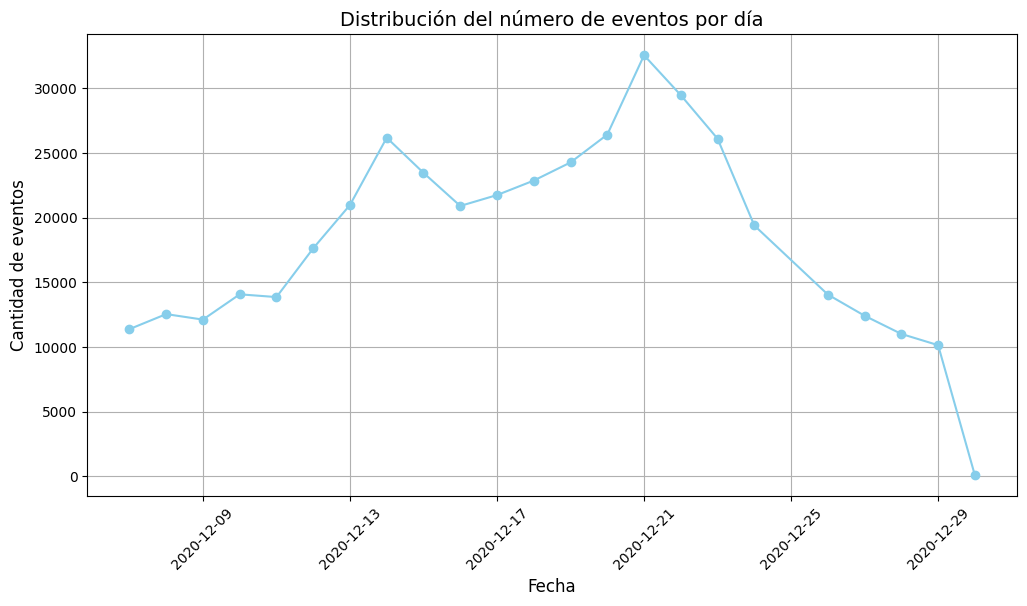

Día con más eventos: 2020-12-21 (32559 eventos)
Día con menos eventos: 2020-12-30 (89 eventos)


In [613]:
# Convertir timestamp a datetime y extraer la fecha
events['event_dt'] = pd.to_datetime(events['event_dt'])
events['date'] = events['event_dt'].dt.date

# Agrupar por fecha y contar eventos
events_per_day = events.groupby('date')['event_name'].count().reset_index()
events_per_day.columns = ['date', 'event_count']

# Gráfico de líneas
plt.figure(figsize=(12, 6))
plt.plot(events_per_day['date'], events_per_day['event_count'], marker='o', color='skyblue')
plt.title('Distribución del número de eventos por día', fontsize=14)
plt.xlabel('Fecha', fontsize=12)
plt.ylabel('Cantidad de eventos', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Día con más y menos eventos
max_events_day = events_per_day.loc[events_per_day['event_count'].idxmax()]
min_events_day = events_per_day.loc[events_per_day['event_count'].idxmin()]
print(f"Día con más eventos: {max_events_day['date']} ({max_events_day['event_count']} eventos)")
print(f"Día con menos eventos: {min_events_day['date']} ({min_events_day['event_count']} eventos)")

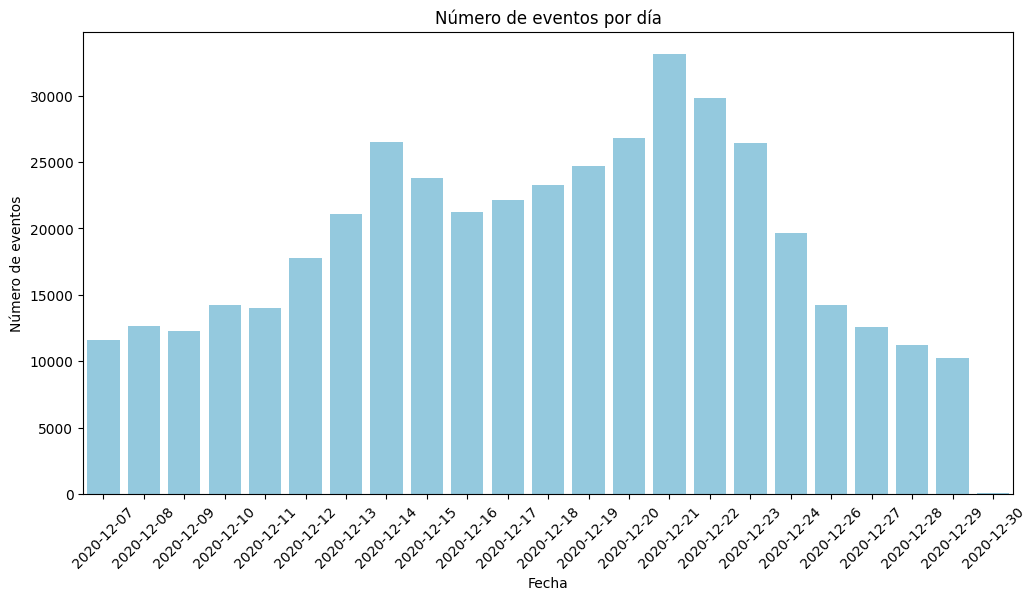

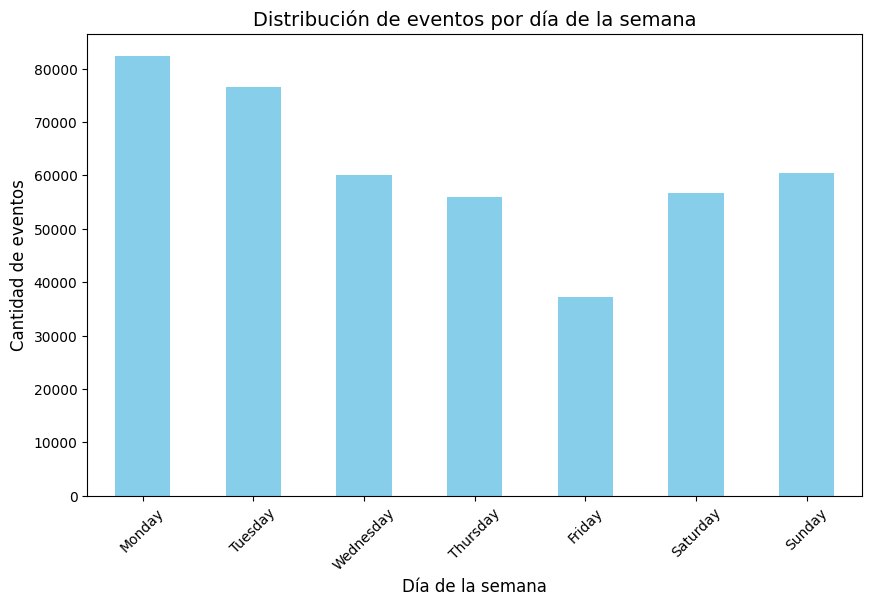

In [ ]:
# Número de eventos por día
ab_group_event['event_dt'] = ab_group_event['event_dt'].dt.date
events_per_day = ab_group_event.groupby('event_dt')['event_name'].count().reset_index()
events_per_day.columns = ['date', 'event_count']

# Grafico de barras de eventos por día
plt.figure(figsize=(12, 6))
sns.barplot(data=events_per_day, x='date', y='event_count', color='skyblue')
plt.title('Número de eventos por día')
plt.xlabel('Fecha')
plt.ylabel('Número de eventos')
plt.xticks(rotation=45)
plt.show()

# Extraer el día de la semana
ab_group_event['event_dt'] = pd.to_datetime(ab_group_event['event_dt'])
ab_group_event['day_of_week'] = ab_group_event['event_dt'].dt.day_name()


# Agrupar por día de la semana
events_per_weekday = ab_group_event.groupby('day_of_week')['event_name'].count().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Visualizar
plt.figure(figsize=(10, 6))
events_per_weekday.plot(kind='bar', color='skyblue')
plt.title('Distribución de eventos por día de la semana', fontsize=14)
plt.xlabel('Día de la semana', fontsize=12)
plt.ylabel('Cantidad de eventos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## <a id='toc6_7_'></a>[Calculo del tamaño minimo de la muestra para la prueba A/B](#toc0_)

In [ ]:

# Parámetros del test
alpha = 0.05  # Nivel de significancia
power = 0.8   # Poder estadístico
p1 = 0.10     # Proporción de conversión en el grupo de control (supuesto)
p2 = 0.11     # Proporción en el grupo de prueba (mejora del 1%)

# Calcula el tamaño del efecto
effect_size = proportion_effectsize(p1, p2)

# Calcula el tamaño mínimo de muestra requerido por grupo
analysis = NormalIndPower()
sample_size = analysis.solve_power(effect_size=effect_size, power=power, alpha=alpha, ratio=1)

print(f"Tamaño mínimo de muestra por grupo: {round(sample_size)}")

Tamaño mínimo de muestra por grupo: 14744


### <a id='toc6_7_1_'></a>[Conclusiones preliminares](#toc0_)
- ``De acuerdo con el cálculo del tamaño mínimo de muestra para una prueba A/B con un nivel de significancia de 0.05, poder estadístico de 0.8 y un tamaño de efecto del 1 %, se requieren aproximadamente 14744 usuarios por grupo. Dado que cada grupo experimental en nuestro estudio no supera los 7433 usuarios en el grupo A y 5764 en el grupo, podemos concluir que el tamaño de muestra es estadísticamente insuficiente para llevar a cabo una prueba A/B robusta y detectar incluso pequeñas diferencias con alta confianza sumado a las pruenas anteriores de significacia estadistica el estudio se va centrando en la mala estructuracion de la prueba``. 

- sin embargo, se ejecutará el análisis para evaluar si existen diferencias significativas entre los grupos, pero con la advertencia de que los resultados deben interpretarse con cautela debido al tamaño de muestra limitado.

## <a id='toc6_8_'></a>[Test A/B](#toc0_)


### <a id='toc6_8_1_'></a>[Automatizacion del analisis de la prueba A/B](#toc0_)

- Es necesario comparar los eventos entre los grupos  con el objetivo de identificar diferencias estadísticamente significativas en las tasas de conversión y en el comportamiento de los usuarios. Este análisis permitirá detectar posibles discrepancias entre los grupos, determinar el evento más frecuente y evaluar si el cambio aplicado en el grupo de prueba ha generado un impacto medible frente a los grupos de control.

- Al automatizar el proceso de comparación a su vez dentro de la comparacion hacemos la correcion de bonferonni que busca optimizar la eficiencia del análisis y garantizar que se realicen pruebas consistentes y repetibles. Esto es esencial para obtener resultados confiables y tomar decisiones informadas basadas en datos.

In [ ]:

# Definición de la función para realizar la prueba de proporciones

def run_proportions_test(df, grupo_1, grupo_2, alpha):
    results = []
    events = df['event_name'].unique()  # Lista de eventos únicos
    num_tests = 0

    # Conteo total de usuarios por grupo
    total_counts = df.groupby('group')['user_id'].nunique()

    for event in events:
        # Filtrar datos para el evento actual
        event_data = df[df['event_name'] == event]
        user_counts = event_data.groupby('group')['user_id'].nunique()

        # Verificar que ambos grupos estén presentes en el evento
        if grupo_1 in user_counts and grupo_2 in user_counts:
            count = [user_counts[grupo_1], user_counts[grupo_2]]  # Usuarios únicos por grupo
            nobs = [total_counts[grupo_1], total_counts[grupo_2]]  # Total de usuarios por grupo
            stat, pval = proportions_ztest(count, nobs)  # Prueba Z
            num_tests += 1

            # Calcular proporciones
            prop1 = count[0] / nobs[0]
            prop2 = count[1] / nobs[1]

            # Guardar resultados
            results.append({
                'evento': event,
                f'grupo_{grupo_1}': f"{count[0]} / {nobs[0]}",
                f'proporcion_grupo_{grupo_1}': prop1,
                f'grupo_{grupo_2}': f"{count[1]} / {nobs[1]}",
                f'proporcion_grupo_{grupo_2}': prop2,
                'p_valor': pval
            })

    # Crear un DataFrame con los resultados
    result_df = pd.DataFrame(results)

    # Corrección de Bonferroni
    bonferroni_alpha = alpha / num_tests
    result_df['significativo'] = result_df['p_valor'] < bonferroni_alpha
    result_df = result_df.sort_values(by=f'proporcion_grupo_{grupo_1}', ascending=False)

    # Preparar datos para gráfico (convertir a formato largo)
    df_plot = pd.melt(
        result_df,
        id_vars='evento',
        value_vars=[f'proporcion_grupo_{grupo_1}', f'proporcion_grupo_{grupo_2}'],
        var_name='grupo',
        value_name='proporcion'
    )

    # Renombrar los grupos para que se vean claros en la leyenda
    df_plot['grupo'] = df_plot['grupo'].map({
        f'proporcion_grupo_{grupo_1}': f'Grupo {grupo_1}',
        f'proporcion_grupo_{grupo_2}': f'Grupo {grupo_2}'
    })

    # Gráfico
    plt.figure(figsize=(12, 6))
    sns.barplot(data=df_plot, x='evento', y='proporcion', hue='grupo')
    plt.title(f'Proporción de usuarios por evento en grupos A/B ({grupo_1} vs {grupo_2})')
    plt.xlabel('Evento')
    plt.ylabel('Proporción de usuarios')
    plt.ylim(0, 1)  # Eje Y entre 0 y 1
    plt.xticks(rotation=45)
    plt.legend(title='Grupo')
    plt.tight_layout()
    plt.show()
    
    # Mostrar resultados
    print(f"\nComparación A/B: Grupo {grupo_1} vs {grupo_2}")
    print(f"\nNúmero total de pruebas realizadas: {num_tests}")
    print(f"Nivel de significancia original: {alpha}")
    print(f"Nivel de significancia con corrección de Bonferroni: {bonferroni_alpha:.5f}\n")

    return result_df

### <a id='toc6_8_2_'></a>[Resultados de la prueba A/B](#toc0_)

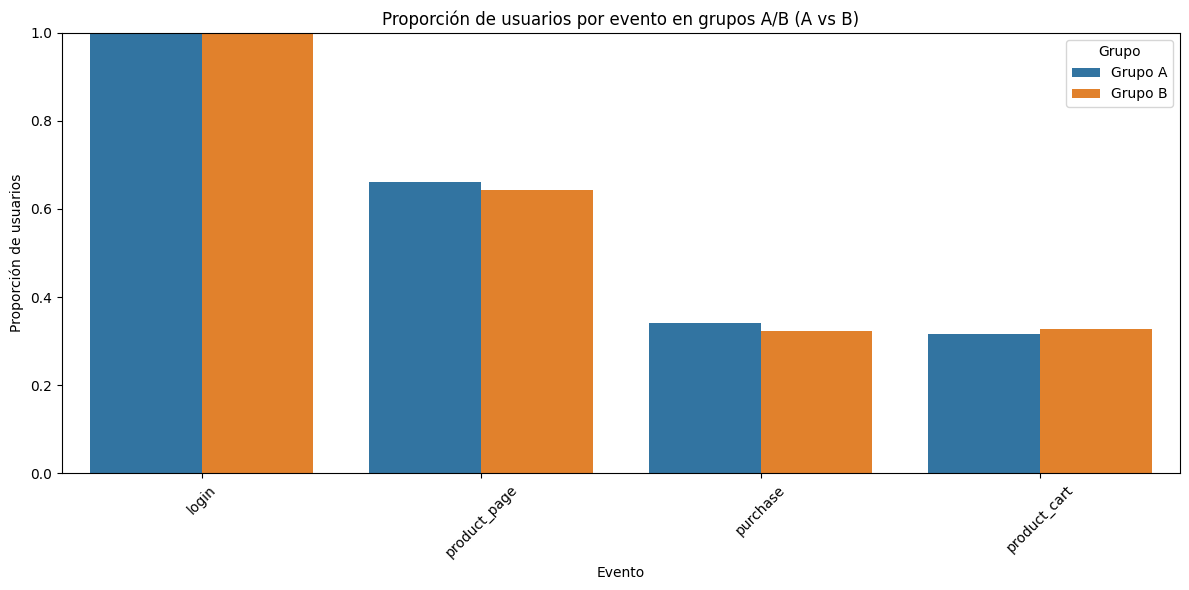


Comparación A/B: Grupo A vs B

Número total de pruebas realizadas: 4
Nivel de significancia original: 0.01
Nivel de significancia con corrección de Bonferroni: 0.00250

         evento      grupo_A  proporcion_grupo_A      grupo_B  \
3         login  7873 / 7874            0.999873  6204 / 6205   
2  product_page  5208 / 7874            0.661417  3986 / 6205   
0      purchase  2682 / 7874            0.340615  2008 / 6205   
1  product_cart  2483 / 7874            0.315342  2037 / 6205   

   proporcion_grupo_B   p_valor  significativo  
3            0.999839  0.865914          False  
2            0.642385  0.018505          False  
0            0.323610  0.033559          False  
1            0.328284  0.102473          False  


In [ ]:
resultados = run_proportions_test(ab_group_event, 'A', 'B', alpha=0.01)

print(resultados)

# <a id='toc7_'></a>[Conclusion Final de la prueba A/B](#toc0_)

Se realizaron pruebas estadísticas para comparar el comportamiento de los usuarios en los grupos experimentales:

- **Grupo B (cambio propuesto)** 
- **Grupos A (versiones actuales)** 

El análisis incluyó cuatro eventos clave en el embudo de conversión de la aplicación, como el ingreso a la pantalla principal, la pantalla de ofertas, el carrito, el pago exitoso.

Aplicando la prueba de proporciones z con corrección de Bonferroni para controlar el error tipo I (nivel de significancia ajustado a 0.002), se obtuvieron los siguientes resultados:

- ``Ninguna de las comparaciones mostró diferencias estadísticamente significativas`` entre el grupo B y los grupos A.
- Las proporciones de usuarios que completaron cada evento fueron muy similares en todos los grupos.
- Los valores p en todos los casos estuvieron muy por encima del umbral de significancia corregido.
- Se detaca el aumento de eventos en general de los grupos, consecuencia de las ofertas de marketing y la campaña publicitaria por la fecha de realizacion de eventos, pero sin diferencias significativas atribuibles al cambio propuesto.

---
## <a id='toc7_1_'></a>[Interpretación de los Resultados](#toc0_)
Teniendo en cuenta el tamaño de muestra limitado frente a los resultados esperados  y la falta de diferencias significativas entre los grupos, se concluye que:

Desde un punto de vista analítico, estos resultados **no respaldan que el cambio implementado en el grupo B haya tenido un impacto significativo en el comportamiento de los usuarios** dentro del embudo.

En consecuencia, **el nuevo diseño o funcionalidad propuesta no produjo mejoras medibles** en términos de participación de usuarios frente a las versiones actuales de la aplicación (grupos A).

---
## <a id='toc7_2_'></a>[Recomendaciones](#toc0_)
- **Reevaluar el diseño del experimento**: Considerar un aumento en el tamaño de la muestra, junto con una evaluación exhaustiva de las variables que influyen en la construcción de datos más robustos, así como una duración más prolongada para futuras pruebas A/B. Esto permitiría identificar diferencias más sutiles y mejorar la validez estadística de los resultados.
- **Analizar otros factores**: Investigar si existen variables externas que puedan haber influido en los resultados, como cambios en el comportamiento del usuario o eventos de marketing que afectaron a todos los grupos por igual.
- **Repetir la prueba**: Una vez que se hayan implementado las recomendaciones anteriores, se sugiere repetir la prueba A/B con un diseño más sólido y un tamaño de muestra adecuado para obtener resultados más concluyentes.
- **Explorar otras métricas**: Considerar la inclusión de métricas adicionales que puedan proporcionar una visión más completa del impacto del cambio propuesto, como la retención de usuarios a largo plazo, el valor promedio de pedido o la satisfacción del cliente.
